In [4]:
!pip install scikit-image>=0.18.0

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import os
import json

In [90]:
def import_json(path):
    file = open(path, 'r')
    data = json.load(file)

    return data

def carregar_imagem(caminho):
    """Carrega uma imagem a partir do caminho especificado."""
    if not os.path.exists(caminho):
        raise FileNotFoundError("Arquivo não encontrado.")
    img = cv2.imread(caminho)
    if img is None:
        raise ValueError("Formato de arquivo inválido ou imagem corrompida.")
    return img

def exibir_dimensoes(img):
    """Retorna altura, largura e número de canais da imagem."""
    h, w, c = img.shape
    return h, w, c


def converter_para_cinza(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def converter_para_hsv(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def calcular_histograma(img):
    """Calcula histograma RGB ou escala de cinza."""
    if len(img.shape) == 2:
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        plt.plot(hist, color='gray')
    else:
        for i, col in enumerate(('b', 'g', 'r')):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
    plt.title("Histograma da Imagem")
    plt.xlabel("Intensidade")
    plt.ylabel("Frequência")
    plt.show()


def identificar_cor_predominante(img):
    """Retorna a cor predominante em BGR e em HSV."""
    cor_media_bgr = cv2.mean(img)[:3]
    hsv = converter_para_hsv(img)
    cor_media_hsv = cv2.mean(hsv)[:3]
    return cor_media_bgr, cor_media_hsv

def detectar_bordas(img):
    """Detecta bordas usando o método Canny."""
    cinza = converter_para_cinza(img)
    return cv2.Canny(cinza, 100, 200)

def calcular_entropia(img):
    cinza = converter_para_cinza(img)
    return skimage.measure.shannon_entropy(cinza)

def calcular_homogeneidade(img):
    cinza = converter_para_cinza(img)
    glcm = skimage.feature.texture.graycomatrix(cinza, [1], [0], 256, symmetric=True, normed=True)
    return skimage.feature.texture.graycoprops(glcm, 'homogeneity')[0, 0]

def calcular_variacao(img):
    cinza = converter_para_cinza(img)
    return np.var(cinza)

def classificar_complexidade(img):
    ent = calcular_entropia(img)
    var = calcular_variacao(img)
    if ent > 5 or var > 1000:
        return "Alta complexidade"
    return "Baixa complexidade"

def detectar_padroes_repetitivos(img):
    """Detecta padrões usando convolução simples."""
    kernel = np.ones((3,3), np.float32)/9
    conv = cv2.filter2D(converter_para_cinza(img), -1, kernel)
    return conv

def gerar_mapa_textura(img):
    """Gera mapa visual de textura."""
    textura = detectar_padroes_repetitivos(img)
    plt.imshow(textura, cmap='gray')
    plt.title("Mapa de Textura")
    plt.axis('off')
    plt.show()

def gerar_graficos_comparativos(img1, img2):
    """Compara histogramas entre duas imagens."""
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Imagem 1")
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,2,2)
    plt.title("Imagem 2")
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()


=== SISTEMA DE ANÁLISE DE IMAGENS ===
1 - Carregar imagem
2 - Exibir dimensões
3 - Converter para cinza
4 - Exibir histograma
5 - Converter para HSV
6 - Cor predominante
7 - Detectar bordas
8 - Detectar contornos e formas
9 - Análise de textura (entropia, variação, homogeneidade)
10 - Classificar complexidade
11 - Gerar mapa de textura
12 - Comparar com outra imagem
0 - Sair
Escolha uma opção: 1
Digite o caminho da imagem: /content/teste1.jpg
Imagem carregada com sucesso!

=== SISTEMA DE ANÁLISE DE IMAGENS ===
1 - Carregar imagem
2 - Exibir dimensões
3 - Converter para cinza
4 - Exibir histograma
5 - Converter para HSV
6 - Cor predominante
7 - Detectar bordas
8 - Detectar contornos e formas
9 - Análise de textura (entropia, variação, homogeneidade)
10 - Classificar complexidade
11 - Gerar mapa de textura
12 - Comparar com outra imagem
0 - Sair
Escolha uma opção: 8


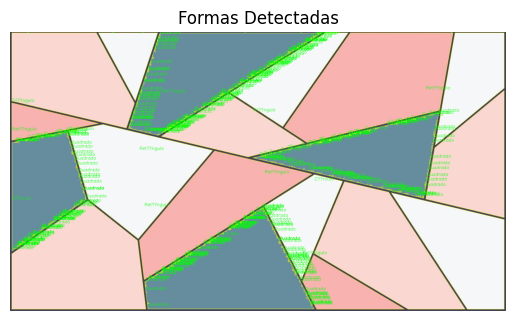

Formas identificadas: {'triângulo': 5, 'quadrado': 403, 'retângulo': 11, 'círculo': 2}

=== SISTEMA DE ANÁLISE DE IMAGENS ===
1 - Carregar imagem
2 - Exibir dimensões
3 - Converter para cinza
4 - Exibir histograma
5 - Converter para HSV
6 - Cor predominante
7 - Detectar bordas
8 - Detectar contornos e formas
9 - Análise de textura (entropia, variação, homogeneidade)
10 - Classificar complexidade
11 - Gerar mapa de textura
12 - Comparar com outra imagem
0 - Sair


KeyboardInterrupt: Interrupted by user

In [ ]:
import time

def menu():
    print("\n=== SISTEMA DE ANÁLISE DE IMAGENS ===")
    print("1 - Carregar imagem")
    print("2 - Exibir dimensões")
    print("3 - Converter para cinza")
    print("4 - Exibir histograma")
    print("5 - Converter para HSV")
    print("6 - Cor predominante")
    print("7 - Detectar bordas")
    print("8 - Detectar contornos e formas")
    print("9 - Análise de textura (entropia, variação, homogeneidade)")
    print("10 - Classificar complexidade")
    print("11 - Gerar mapa de textura")
    print("12 - Comparar com outra imagem")
    print("0 - Sair")

def main():
    img = None

    while True:
        menu()
        opcao = input("Escolha uma opção: ")

        if opcao == "0":
            print("Encerrando o sistema.")
            break

        elif opcao == "1":
            caminho = input("Digite o caminho da imagem: ")
            img = carregar_imagem(caminho)
            print("Imagem carregada com sucesso!")

        elif img is None:
            print("Por favor, carregue uma imagem primeiro (opção 1).")

        elif opcao == "2":
            h, w, c = exibir_dimensoes(img)
            print(f"Dimensões: {w}x{h} | Canais: {c}")

        elif opcao == "3":
            plt.imshow(converter_para_cinza(img), cmap='gray')
            plt.title("Imagem em Escala de Cinza")
            plt.axis('off')
            plt.show()
            time.sleep(1)

        elif opcao == "4":
            calcular_histograma(img)
            time.sleep(1)

        elif opcao == "5":
            hsv = converter_para_hsv(img)
            plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
            plt.title("Imagem em HSV")
            plt.axis('off')
            plt.show()
            time.sleep(1)

        elif opcao == "6":
            bgr, hsv = identificar_cor_predominante(img)
            print(f"Cor predominante (BGR): {bgr}")
            print(f"Cor predominante (HSV): {hsv}")

        elif opcao == "7":
            edges = detectar_bordas(img)
            plt.imshow(edges, cmap='gray')
            plt.title("Bordas Detectadas")
            plt.axis('off')
            plt.show()
            time.sleep(1)

        elif opcao == "8":
            img_cont, formas = detectar_contornos(img)
            plt.imshow(cv2.cvtColor(img_cont, cv2.COLOR_BGR2RGB))
            plt.title("Formas Detectadas")
            plt.axis('off')
            plt.show()
            if formas:
                print("Formas identificadas:", formas)
            else:
                print("Nenhuma forma identificada do forms.json.")
            time.sleep(1)


        elif opcao == "9":
            print(f"Entropia: {calcular_entropia(img):.2f}")
            print(f"Variação: {calcular_variacao(img):.2f}")
            print(f"Homogeneidade: {calcular_homogeneidade(img):.4f}")

        elif opcao == "10":
            print("Complexidade da imagem:", classificar_complexidade(img))

        elif opcao == "11":
            gerar_mapa_textura(img)
            time.sleep(1)

        elif opcao == "12":
            caminho2 = input("Digite o caminho da segunda imagem: ")
            img2 = carregar_imagem(caminho2)
            gerar_graficos_comparativos(img, img2)
            time.sleep(1)


        else:
            print("Opção inválida, tente novamente.")

main()